In [44]:
import numpy as np
import matplotlib.pyplot as plt 

# Weighted fit

In [45]:
def weighted_fit(x,y,e):
    
    w = 1/(e**2)
    sum_w = np.sum(w)
    sum_x2 = np.sum(w*x**2)
    sum_y = np.sum(w*y)
    sum_x = np.sum(w*x)
    sum_xy = np.sum(w*x*y)
    Delta = sum_w*sum_x2 - sum_x**2
    
    m = (sum_w*sum_xy - sum_x*sum_y)/Delta
    b = (sum_x2*sum_y - sum_x*sum_xy)/Delta
    
    m_err = np.sqrt(sum_w/Delta)
    b_err = np.sqrt(sum_x2/Delta)
    
    return (m,b) , (m_err,b_err) 

**6.2**

In [46]:
f = np.array([10.,20.,30.,40.,50.,60.,70.,80.,90.,100.,110.])
V = np.array([16.,45.,64.,75.,70.,115.,142.,167.,183.,160.,221.])
error = np.array([5.,5.,5.,5.,30.,5.,5.,5.,5.,30.,5.])

coef, err = weighted_fit(f,V,error)
model = lambda x: coef[0]*x + coef[1]

print("Slope: ", round(coef[0],2), " +/- ", round(err[0],2))
print("Intercept: ", round(coef[1],0), " +/- ", round(err[1],0))

Slope:  2.03  +/-  0.05
Intercept:  -1.0  +/-  3.0


In agreement.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1724\4201410662.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


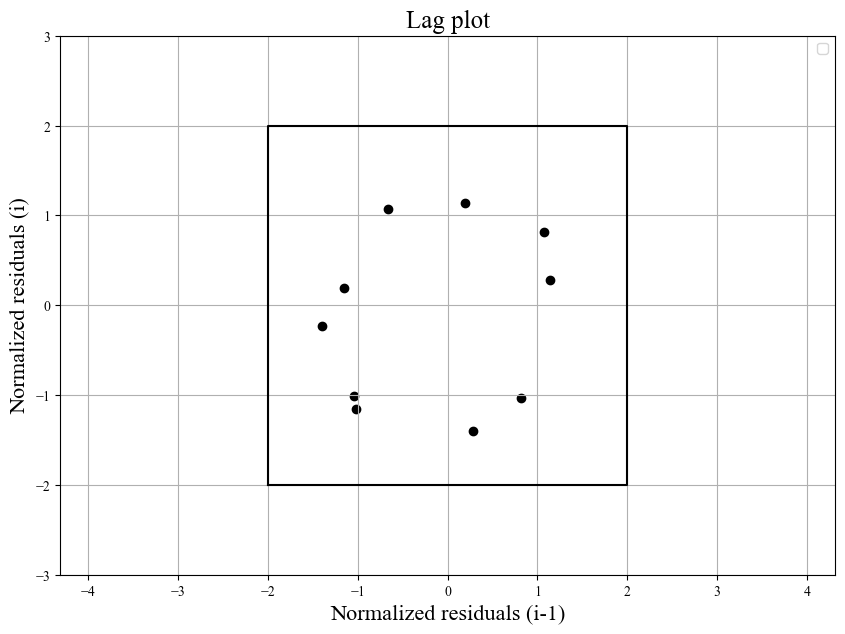

In [47]:
R = (V - model(f))/error

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.scatter(R[:-1],R[1:],color='black')

x = [-2, 2, 2, -2, -2]
y = [-2, -2, 2, 2, -2]
plt.plot(x, y, 'k-')
plt.axis('equal') 

plt.ylim(-3,3)
plt.xlim(-3,3)
plt.title("Lag plot", fontsize=18)
plt.ylabel("Normalized residuals (i)", fontsize=16)
plt.xlabel("Normalized residuals (i-1)",fontsize=16)
plt.grid(True)
plt.legend()

In [48]:
D = np.sum((R[:-1]-R[1:])**2) / np.sum(R**2)
print("D = ", D)

D =  1.5517903818095427


**6.3**

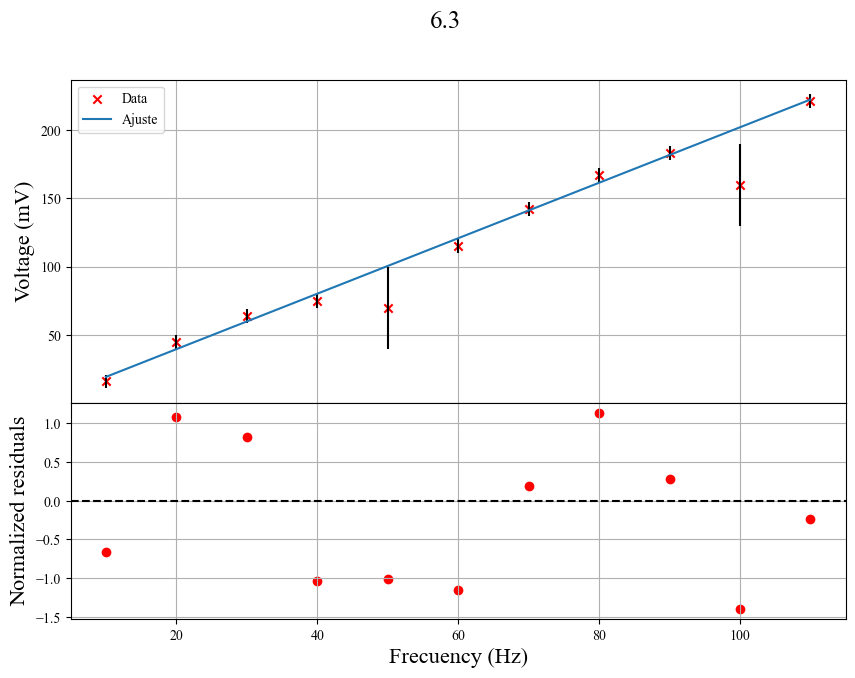

In [49]:
plt.rc('font', family='Times New Roman')
fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("6.3", fontsize=18)

axs[0].scatter(f,V,marker='x',color='r',label='Data')
axs[0].errorbar(f,V,yerr= error, fmt='none', ecolor='black')
axs[0].plot(f,model(f),label='Ajuste')
axs[0].set_ylabel("Voltage (mV)", fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()
axs[0].grid()

axs[1].scatter(f,(V-model(f))/error,color='r')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel("Frecuency (Hz)",fontsize=16)
axs[1].set_ylabel('Normalized residuals', fontsize=16)
axs[1].grid()

**6.4**

In [50]:
chi_i = R**2
chi_2 = np.sum(chi_i)
print(r'chi^2 = ', chi_2)

chi^2 =  9.115903588053024


i)

In [51]:
from scipy.optimize import minimize

def chi_2(param, x, y, e):
    m, b = param
    model = m*x + b
    chi_i = (y - model)**2 / e**2
    return np.sum(chi_i)

param0 = (1.,1.)
result = minimize(chi_2, param0, args=(f,V,error))
m_best, c_best = result.x
chi_2_min = result.fun

print("Slope: ", round(m_best,2))
print("Intercept: ", round(c_best,2))
print("chi_2_min = ", chi_2_min)

Slope:  2.03
Intercept:  -0.95
chi_2_min =  9.115903588053298


**6.5**

In [52]:
d = np.array([0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45, 1.65, 1.85])
ph = np.array([0., 0.21, 0.44, 0.67, 0.88, 1.1, 1.3, 1.5, 2., 2.24])
error = np.array([0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.2, 0.5, 0.1, 0.07])

coef, err = weighted_fit(d,ph,error)
model = lambda x: coef[0]*x + coef[1]

print("Slope: ", round(coef[0],2), " +/- ", round(err[0],2))
print("Intercept: ", round(coef[1],2), " +/- ", round(err[1],2))

Slope:  1.24  +/-  0.04
Intercept:  -0.11  +/-  0.03


In [53]:
c = 2*np.pi*60*1e6 / coef[0]
c_err = 2*np.pi*60*1e6 / coef[0]**2 * err[0]
print("c = (", round(c,-6), " +/- ", round(c_err,-6), ") m/s")

c = ( 304000000.0  +/-  10000000.0 ) m/s


El intercepto es muy cercano a 0.

**6.6**

In [54]:
x = np.linspace(1,10,10)
y = np.array([51., 103., 150., 199., 251., 303., 347., 398., 452., 512.])

i)

In [55]:
error = np.array([1., 1., 2., 2., 3., 3., 4., 5., 6., 7.])

coef, err = weighted_fit(x,y,error)
model = lambda x: coef[0]*x + coef[1]

print("Slope: ", round(coef[0],1), " +/- ", round(err[0],1))
print("Intercept: ", round(coef[1],0), " +/- ", round(err[1],0))

Slope:  49.9  +/-  0.3
Intercept:  2.0  +/-  1.0


ii)

In [56]:
error = np.array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

coef, err = weighted_fit(x,y,error)
model = lambda x: coef[0]*x + coef[1]

print("Slope: ", round(coef[0],1), " +/- ", round(err[0],1))
print("Intercept: ", round(coef[1],0), " +/- ", round(err[1],0))

Slope:  50.5  +/-  0.4
Intercept:  -1.0  +/-  3.0


iii)

In [57]:
error = np.array([1., 1., 1., 1., 1., 8., 8., 8., 8., 8.])

coef, err = weighted_fit(x,y,error)
model = lambda x: coef[0]*x + coef[1]

print("Slope: ", round(coef[0],1), " +/- ", round(err[0],1))
print("Intercept: ", round(coef[1],0), " +/- ", round(err[1],1))

Slope:  49.7  +/-  0.3
Intercept:  2.0  +/-  1.0


El primer set y el último tuvieron la mísma precisión. Mientras que el set de incertidumbre constante presentó más baja precisión. 